In [ ]:
pip install nbformat==4.2.0

In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
pip install --upgrade nbformat

  Using cached nbformat-5.10.4-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastjsonschema-2.21.2-py3-none-any.whl.metadata (2.3 kB)
Using cached nbformat-5.10.4-py3-none-any.whl (78 kB)
Using cached fastjsonschema-2.21.2-py3-none-any.whl (24 kB)

   ---------------------------------------- 0/2 [fastjsonschema]
  Attempting uninstall: nbformat
   ---------------------------------------- 0/2 [fastjsonschema]
    Found existing installation: nbformat 4.2.0
   ---------------------------------------- 0/2 [fastjsonschema]
   -------------------- ------------------- 1/2 [nbformat]
    Uninstalling nbformat-4.2.0:
   -------------------- ------------------- 1/2 [nbformat]
      Successfully uninstalled nbformat-4.2.0
   -------------------- ------------------- 1/2 [nbformat]
   -------------------- ------------------- 1/2 [nbformat]
   -------------------- ------------------- 1/2 [nbformat]
   -------------------- ------------------- 1/2 [nbformat]
   -------------------- --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [ ]:
df = pd.read_csv('netflix_titles.csv')

In [ ]:
print(f"Dataset Shape: {df.shape}")
print(df.head())

In [ ]:
df.info()

In [ ]:
df['director'] = df['director'].fillna('No Director')

In [ ]:
df['cast'] = df['cast'].fillna('No Cast')

In [ ]:
df['country'] = df['country'].fillna('Unknown Country')

In [ ]:
df.head()

In [ ]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [ ]:
df.head(10)

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

In [ ]:
print(df.isnull().sum())
print("\nNew Shape:", df.shape)


In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
df['month_added'] = df['date_added'].dt.month_name()

In [ ]:
print(df[['date_added', 'year_added', 'month_added']].head(10))

In [ ]:
trend_data = df.groupby(['year_added', 'type']).size().reset_index(name='count')

In [ ]:
df['year_added'] = df['date_added'].dt.year

In [ ]:
trend_data = df.groupby(['year_added', 'type']).size().reset_index(name='count')

In [ ]:
print(trend_data.head())
print("\nColumns:", trend_data.columns)

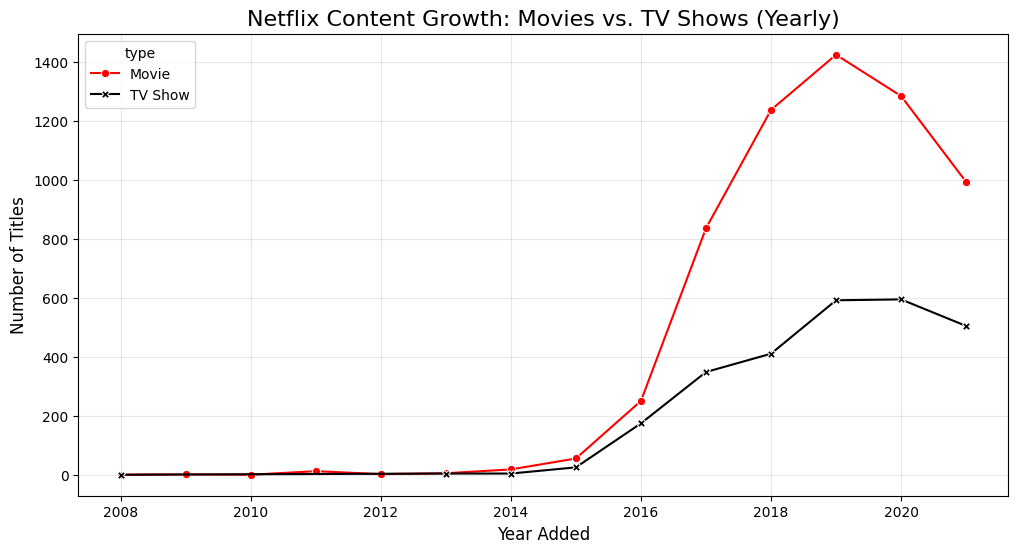

In [31]:
plt.figure(figsize=(12, 6))

# Line plot banate hain
sns.lineplot(data=trend_data, 
             x='year_added', 
             y='count', 
             hue='type',           # Alag rang Movies aur TV Shows ke liye
             style='type',         # Alag style (solid/dashed)
             markers=True,         # Points dikhane ke liye
             dashes=False, 
             palette=['red', 'black']) # Netflix colors

# Thoda makeup (Styling)
plt.title('Netflix Content Growth: Movies vs. TV Shows (Yearly)', fontsize=16)
plt.xlabel('Year Added', fontsize=12)
plt.ylabel('Number of Titles', fontsize=12)
plt.grid(True, alpha=0.3) # Halki si lines peeche

# Graph show karein
plt.show()

In [32]:
heatmap_data = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

In [35]:
heatmap_matrix = heatmap_data.pivot(index='month_added', columns='year_added', values='count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
heatmap_matrix = heatmap_matrix.reindex(month_order)

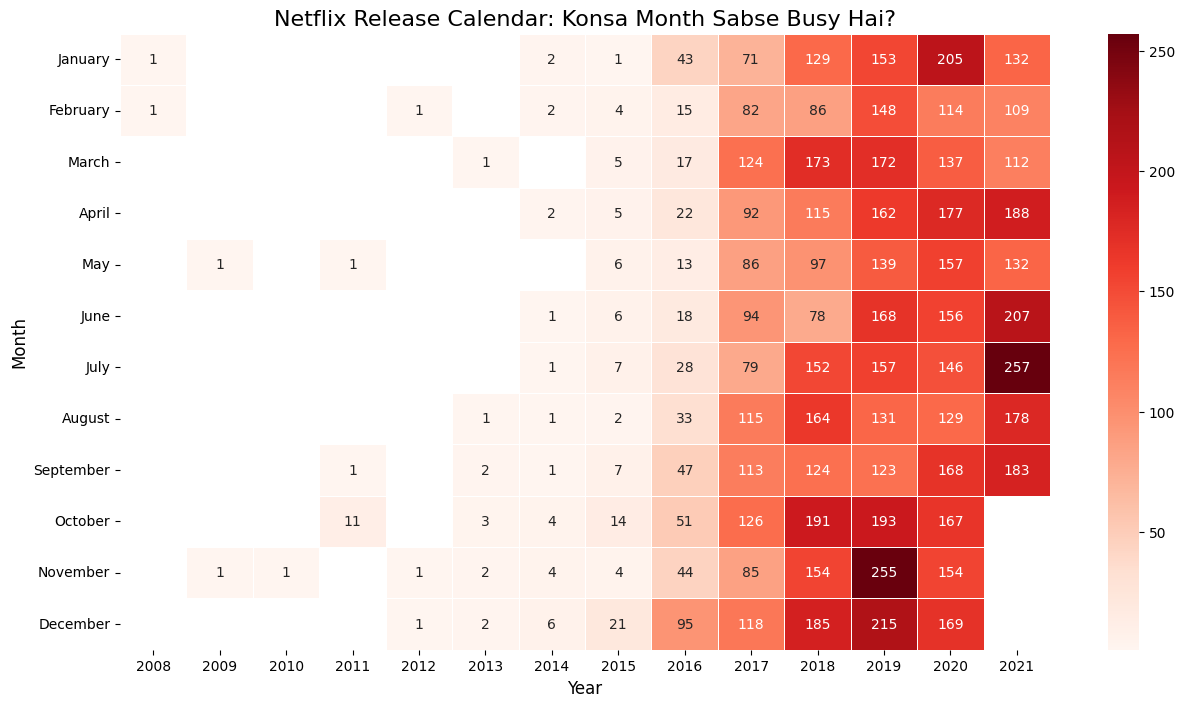

In [36]:
plt.figure(figsize=(15, 8)) # Graph bada banayenge taake saaf dikhe
sns.heatmap(heatmap_matrix, 
            annot=True,       # Har box mein number likha aaye
            fmt='.0f',        # Points (.) nahi chahiye
            cmap='Reds',      # Netflix ka Red color theme
            linewidths=.5)    # Boxes ke beech gap

plt.title('Netflix Release Calendar: Konsa Month Sabse Busy Hai?', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.show()

C:\Users\Arjuntalreja\AppData\Local\Temp\ipykernel_13524\3226983960.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




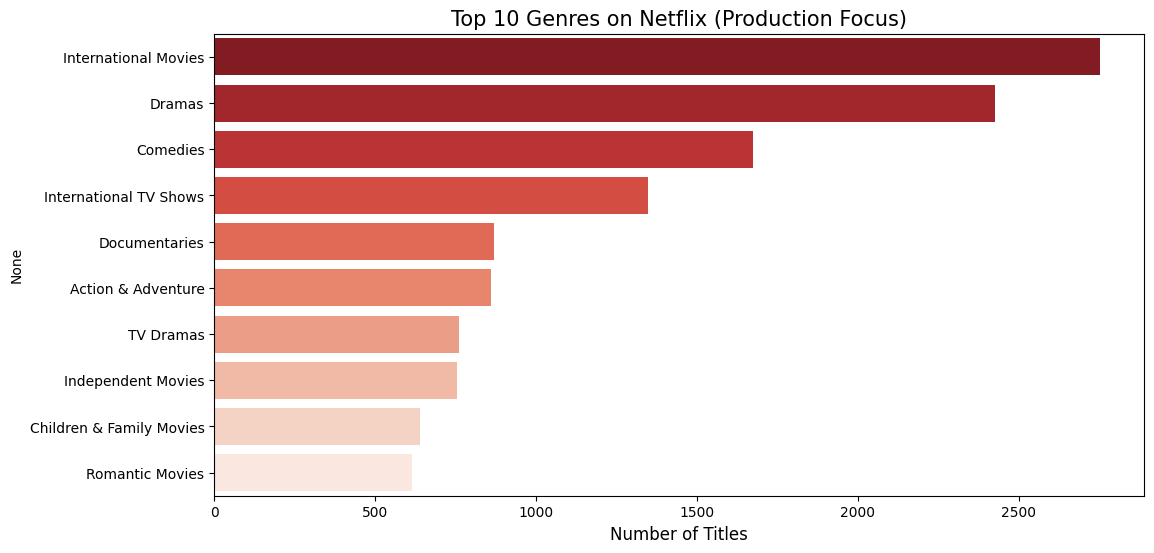

In [37]:
# 1. Genres ko alag karna (Kyunki ek movie 'Action, Comedy' dono ho sakti hai)
# Hum 'listed_in' column ko split karenge
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# 2. Top 10 Genres nikalna
top_genres = filtered_genres.value_counts().head(10)

# 3. Bar Chart Banana
plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='Reds_r') # Netflix Red Theme

plt.title('Top 10 Genres on Netflix (Production Focus)', fontsize=15)
plt.xlabel('Number of Titles', fontsize=12)
plt.show()


## Country Analysis (Top 10 Content Producing Countries)

In [39]:
top_countries = df['country'].value_counts().head(10)

C:\Users\Arjuntalreja\AppData\Local\Temp\ipykernel_13524\3327403623.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




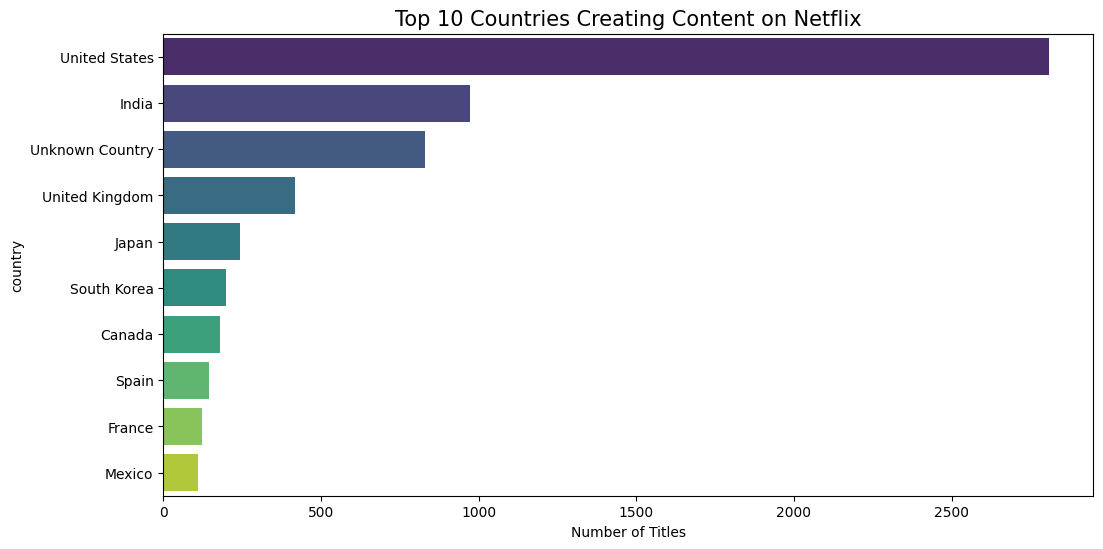

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')

plt.title('Top 10 Countries Creating Content on Netflix', fontsize=15)
plt.xlabel('Number of Titles')
plt.show()

## Rating Analysis (Target Audience)

C:\Users\Arjuntalreja\AppData\Local\Temp\ipykernel_13524\3389855198.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




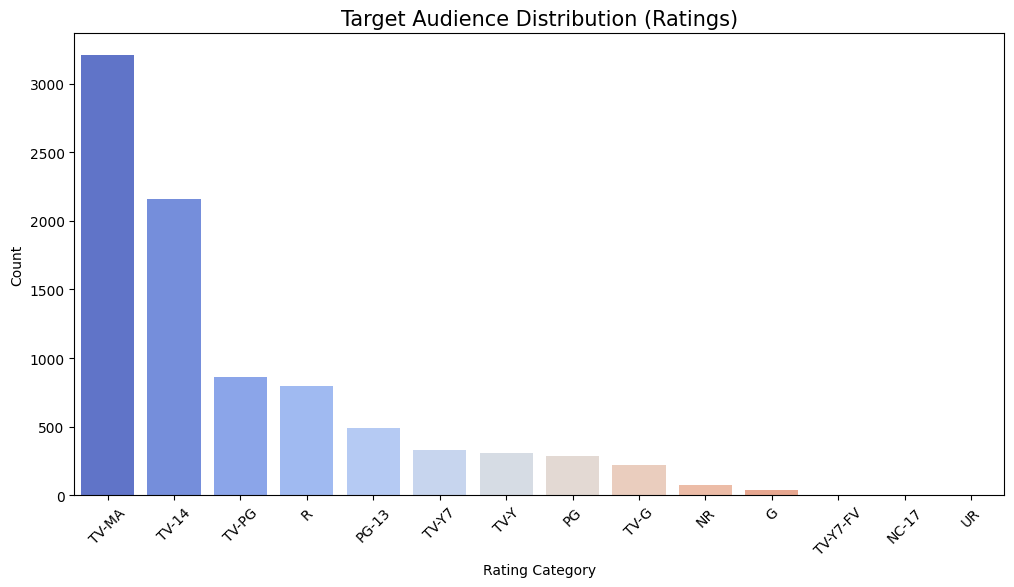

In [41]:
plt.figure(figsize=(12, 6))

# Countplot banayenge ratings ke liye
sns.countplot(data=df, 
              x='rating', 
              order=df['rating'].value_counts().index, # Zyada se kam ki taraf sort
              palette='coolwarm')

plt.title('Target Audience Distribution (Ratings)', fontsize=15)
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45) # Neeche likhe naam tedhe karein taake padhe ja sakein
plt.show()

## Movie Duration Distribution

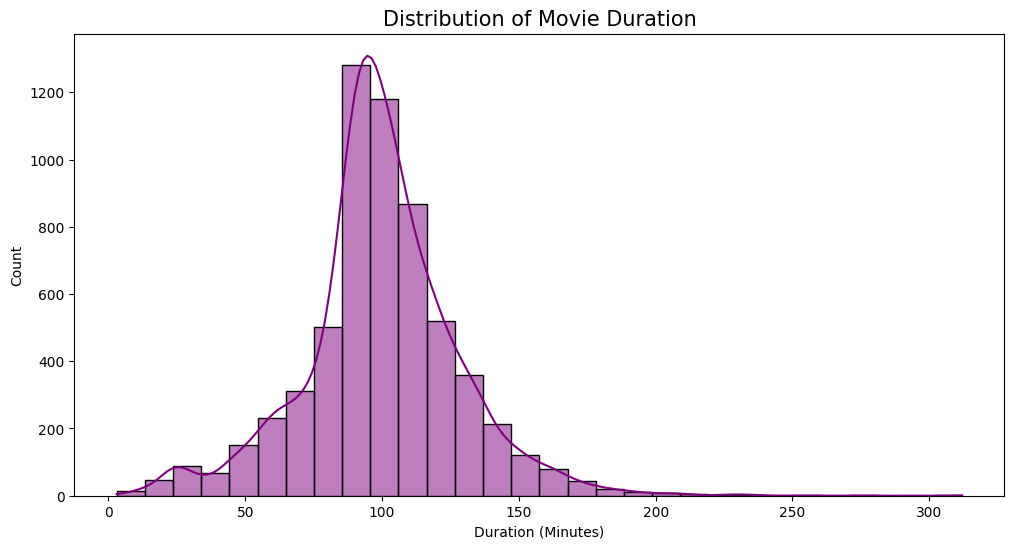

In [42]:
# 1. Sirf Movies ko alag karein
movies_df = df[df['type'] == 'Movie'].copy()

# 2. 'min' likha hua hatayein aur number banayein (e.g., "90 min" -> 90)
movies_df['duration_min'] = movies_df['duration'].str.replace(' min', '').astype(int)

# 3. Histogram Banana (Distribution dekhne ke liye)
plt.figure(figsize=(12, 6))
sns.histplot(movies_df['duration_min'], bins=30, kde=True, color='purple')

plt.title('Distribution of Movie Duration', fontsize=15)
plt.xlabel('Duration (Minutes)')
plt.show()